In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('C:\\Users\\LENOVO\Downloads\\13. Capstone Case Study - Demand Estimation\\Electricity Consumption.csv')
data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [5]:
data['DATE']=data['DATE'].apply(lambda x: pd.to_datetime(x))

In [8]:
data.set_index(data['DATE'],inplace=True)

In [15]:
data.columns=['Sales']

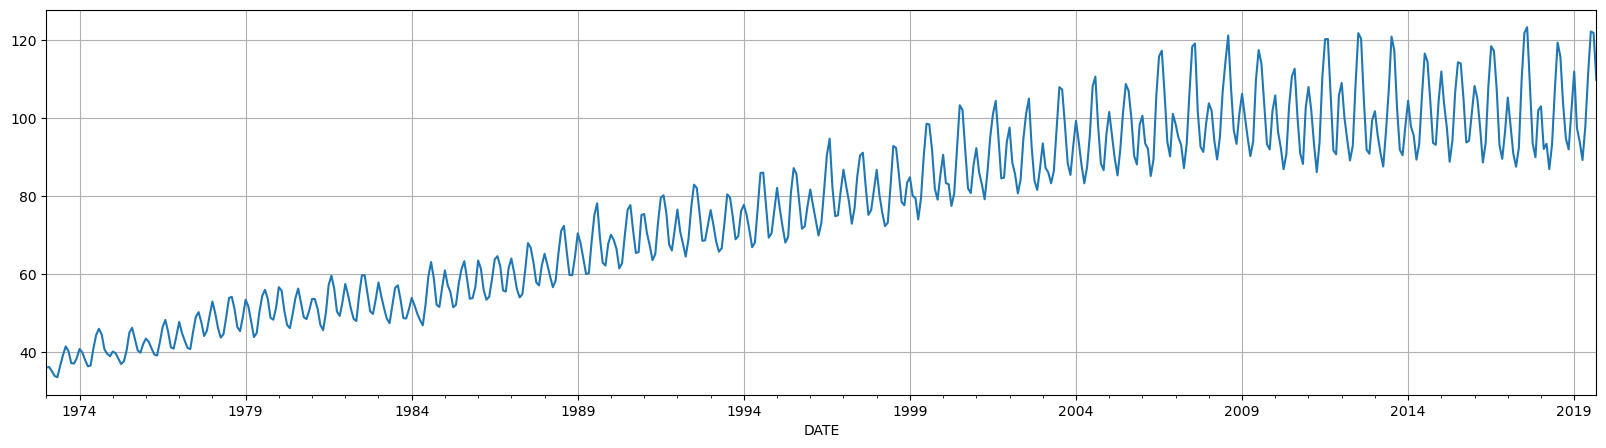

In [16]:
plt.figure(figsize=(20,5))
data['Sales'].plot()
plt.grid()

# Decomposition of Data

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

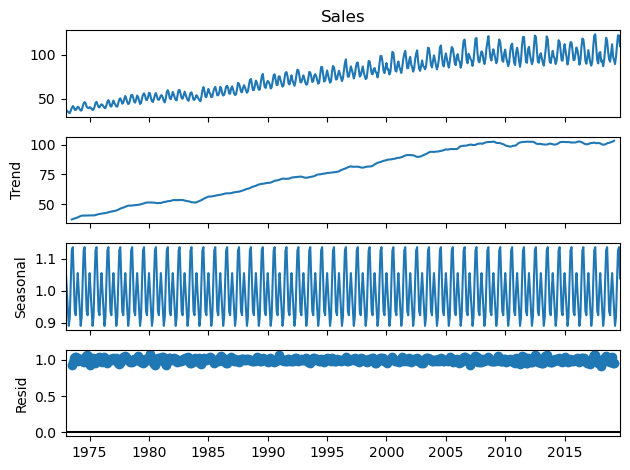

In [18]:
decom=seasonal_decompose(data['Sales'],model='multiplicative')
decom.plot()
plt.show()

By performing decomposition we get to see that the data shows upward trend


# Now we will check if the given data is stationary or not


In [19]:
from statsmodels.tsa.stattools import adfuller 

In [20]:
def get_adfuller( ts):
    res=pd.Series(adfuller(ts)[0:4],
                  index=['Test Statistics','p-value','Lags used','No. of observations'])
    return res                                      



In [21]:
get_adfuller(data['Sales'])

Test Statistics         -1.740593
p-value                  0.410328
Lags used               15.000000
No. of observations    545.000000
dtype: float64

AS WE CAN SEE THAT THE P-VALUE IS GREATER THAN SIGNIFICANT VALUE i.e 0.05 WHICH MEANS THE DATA IS NOT STATIONARY

# Differencing

In [22]:
get_adfuller(data['Sales'].diff(1).dropna())

Test Statistics       -7.941665e+00
p-value                3.301344e-12
Lags used              1.400000e+01
No. of observations    5.450000e+02
dtype: float64

# NOW WE WILL PERFORM MODELLING ON THE DATA


# ARIMA MODEL

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
model=ARIMA(data['Sales'],order=(2,1,3))
model_fit=model.fit()
pred=model_fit.predict()

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Mean Absolute Error

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(data,pred)

2.2118502935475317

# Root Mean Squared Error

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
np.sqrt(mean_squared_error(data,pred))

3.310355223464605

# Iteration to get the best value of (p,d,q) 

In [30]:
p_range=range(0,4)
d_range=range(0,4)
q_range=range(0,4)

In [31]:
order_list,aic_list,error_list=[],[],[]
for p in p_range:
    for d in d_range:
        for q in q_range:
            order=(p,d,q)
            model=ARIMA(data,order=order)
            model_fit=model.fit()
            pred=model_fit.predict()
            mae=mean_absolute_error(data,pred)
            
            order_list.append(order)
            error_list.append(mae)
            aic_list.append(model_fit.aic)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

In [32]:
res=pd.DataFrame({
    'order':order_list,
    'aic':aic_list,
    'error':error_list
})
res.sort_values(by='error')

,order,aic,error
39,"(2, 1, 3)",2817.933236,2.211850
54,"(3, 1, 2)",2819.495932,2.219584
51,"(3, 0, 3)",2832.138232,2.228060
38,"(2, 1, 2)",2827.247125,2.275363
50,"(3, 0, 2)",2846.286261,2.295700
...,...,...,...
12,"(0, 3, 0)",3964.621554,6.518192
28,"(1, 3, 0)",3958.105892,6.587527
2,"(0, 0, 2)",3943.618610,6.820677
1,"(0, 0, 1)",4424.271222,10.562140


# FORECASTING THE DEMAND FOR UPCOMING TWO YEARS

In [33]:
model_fit.forecast(steps=24)

2019-10-01    101.293917
2019-11-01    102.295144
2019-12-01    111.336830
2020-01-01    118.147300
2020-02-01    115.015020
2020-03-01    104.042055
2020-04-01     95.202122
2020-05-01     96.304947
2020-06-01    105.222537
2020-07-01    112.017180
2020-08-01    108.880343
2020-09-01     97.928281
2020-10-01     89.077039
2020-11-01     90.128525
2020-12-01     98.980238
2021-01-01    105.736986
2021-02-01    102.603791
2021-03-01     91.669327
2021-04-01     82.808010
2021-05-01     83.807863
2021-06-01     92.594004
2021-07-01     99.312761
2021-08-01     96.183072
2021-09-01     85.266065
Freq: MS, Name: predicted_mean, dtype: float64

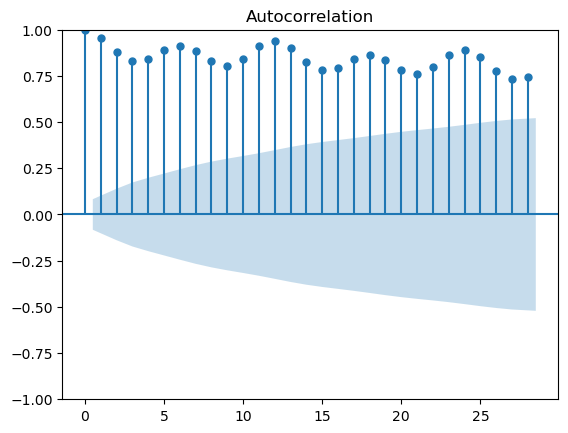

In [34]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data['Sales'])
plt.show()

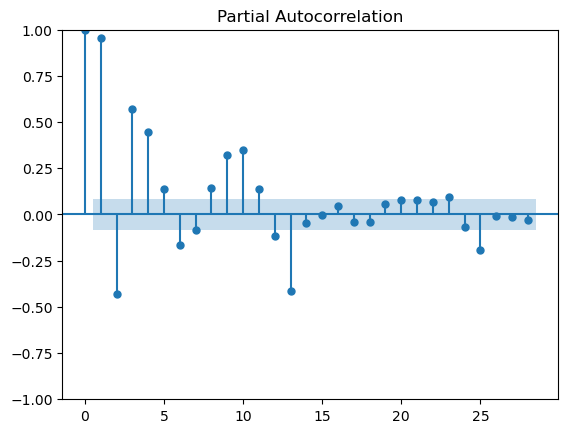

In [35]:
plot_pacf(data['Sales'])
plt.show()

# SARIMAX

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
order=(2,1,3)
seasonal_order=(1,0,1,12)
model=SARIMAX(data,order=order,seasonal_order=seasonal_order)
model_fit=model.fit()
preds=model_fit.predict()



C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
mean_absolute_error(data,preds)

1.4561312706040928

In [39]:
np.sqrt(mean_squared_error(data,preds))

2.413492570886603

In [41]:
f_cast=model_fit.forecast(steps=24)
f_cast

2019-10-01     98.285253
2019-11-01     96.736247
2019-12-01    106.587169
2020-01-01    112.489019
2020-02-01    103.310812
2020-03-01     98.885642
2020-04-01     93.322368
2020-05-01     99.739336
2020-06-01    113.679268
2020-07-01    124.274916
2020-08-01    122.936296
2020-09-01    110.728161
2020-10-01     99.475824
2020-11-01     97.983671
2020-12-01    107.809953
2021-01-01    113.669676
2021-02-01    104.511940
2021-03-01    100.074704
2021-04-01     94.551102
2021-05-01    100.965483
2021-06-01    114.848852
2021-07-01    125.369390
2021-08-01    123.999073
2021-09-01    111.836744
Freq: MS, Name: predicted_mean, dtype: float64


AS WE CAN SEE THAT MAE AND RMSE IS LOWER IN SARIMA MODEL AS COMPARED TO ARIMA MODEL SO IN THIS CASE WE PREFER CHOOSING SARIMA MODEL FOR FORECASTING.
